<a href="https://colab.research.google.com/github/pacayton/forecast_combination_seminar/blob/main/Forecast_Combination_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecast Combination Using R**

### Peter Julian Cayton
### *Associate Professor, School of Statistics, University of the Philippines Diliman*

## Materials on GitHub:

https://github.com/pacayton/forecast_combination_seminar

## Contents:
1.   Basic Background
2.   Some Methods in Forecast Combination with Sample Codes
3.   References


Before we begin: 

1. Please load the data from GitHub to your Files folder in Google Colab
2. A preamble of code below

In [ ]:
install.packages("fpp3")
install.packages("fpp2")

library(fpp2)
library(fpp3)

COVID <- read.csv("/content/COVID_national_data.csv")
Monthly <- read.csv("/content/PhilMonthlyData.csv")
Quarterly <- read.csv("/content/PhilQuarterData.csv")

### 1. Basic Background

*   Combining forecasts from different models to improve predictive accuracy has long been known (Bates & Granger 1969; Clemen 1989).
*   Even simply averaging the forecasts from multiple models can improve accuracy greatly (Clemen 1989)
*   Recent use of forecast combinations have surged with the increase in computing power, the growth of data science, and forecasting competitions (Makridakis, Spiliotis, & Assimakopoulos 2020). 
*   More recently, forecast combination methods have been called "ensemble forecasting" but they are essentially similar in terms of combining forecasts from different model configurations.
*   With COVID-19, forecast ensembles have been used for cases, deaths, and hospitalizations in the US (Ray, et al. 2020) and for deaths in multiple countries (Imperial College COVID-19 response team 2022)



### 2. Some Methods in Forecast Combination with Sample Codes

#### 1. Simple Average/Equal Weights Method

> This means averaging the forecasts from different models for the horizon with equal weights






Sample Code in R based on FPP2 (Hyndman & Athanasopoulos 2018) applied to Philippine GDP data

,Qtr1,Qtr2,Qtr3,Qtr4
1981,154381.0,159549.0,148592.0,168120.0
1982,159109.0,165495.0,151909.0,176954.0
1983,164767.0,174926.0,154601.0,171423.0
1984,157448.0,163802.0,137680.0,158032.0
1985,139990.0,147629.0,130098.0,154166.0
1986,139896.0,151701.0,140092.0,159734.0
1987,144219.0,157193.0,149537.0,165974.0
1988,152816.0,160890.0,158376.0,186499.0
1989,162483.0,169601.0,166980.0,200384.0
1990,171001.0,175530.0,173135.0,201024.0


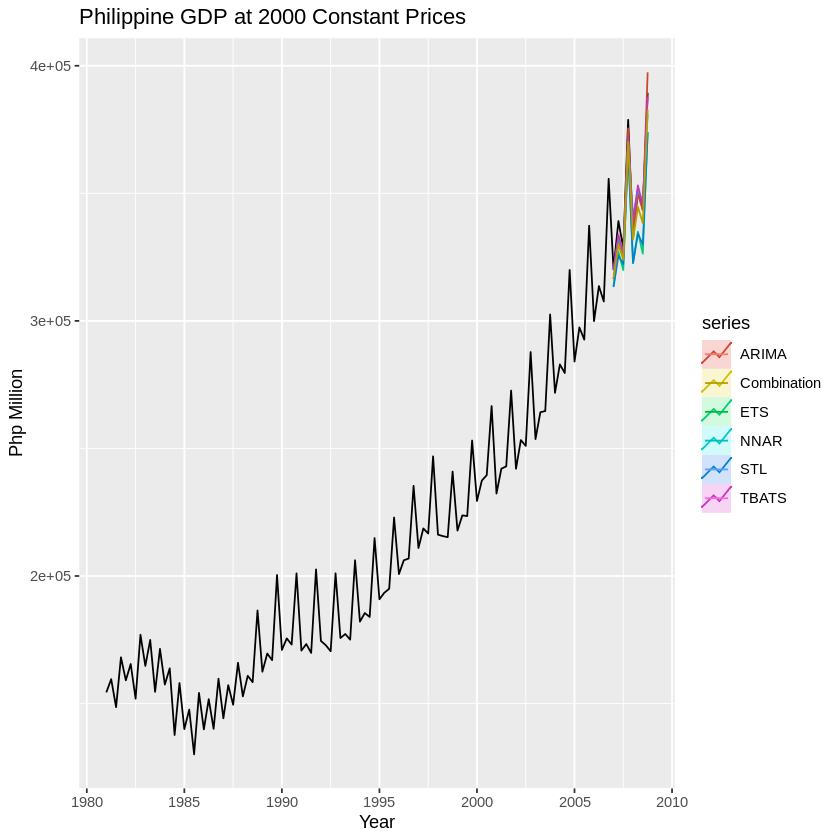

In [6]:
### Extract Philippine GDP Data from Quarterly file
gdp <- ts(Quarterly$gdp, start = c(1981, 1), frequency = 4)

### Show the data
gdp

### Train Data
gdp.train <- window(gdp, end = c(2006, 4))

### Forecast Horizon
h <- length(gdp) - length(gdp.train)

### The five models as example
ETS <- forecast(ets(gdp.train), h=h)
ARIMA <- forecast(auto.arima(gdp.train, lambda=0, biasadj=TRUE),
  h=h)
STL <- stlf(gdp.train, lambda=0, h=h, biasadj=TRUE)
NNAR <- forecast(nnetar(gdp.train), h=h)
TBATS <- forecast(tbats(gdp.train, biasadj=TRUE), h=h)

### Combining the forecasts
Combination <- (ETS[["mean"]] + ARIMA[["mean"]] +
  STL[["mean"]] + NNAR[["mean"]] + TBATS[["mean"]])/5

### PLot of the Forecasts
autoplot(gdp) +
  autolayer(ETS, series="ETS", PI=FALSE) +
  autolayer(ARIMA, series="ARIMA", PI=FALSE) +
  autolayer(STL, series="STL", PI=FALSE) +
  autolayer(NNAR, series="NNAR", PI=FALSE) +
  autolayer(TBATS, series="TBATS", PI=FALSE) +
  autolayer(Combination, series="Combination") +
  xlab("Year") + ylab("Php Million") +
  ggtitle("Philippine GDP at 2000 Constant Prices")


### 3. References:

1. Bates, J. M., & Granger, C. W. J. (1969). The combination of forecasts. Operational Research Quarterly, 20(4), 451–468. https://www.tandfonline.com/doi/abs/10.1057/jors.1969.103

2. Clemen, R. (1989). Combining forecasts: A review and annotated bibliography. International Journal of Forecasting, 5(4), 559–583. https://www.sciencedirect.com/science/article/abs/pii/0169207089900125

3. Hyndman, R.J., & Athanasopoulos, G. (2018) Forecasting: principles and practice, 2nd edition, OTexts: Melbourne, Australia. OTexts.com/fpp2. Accessed on 2022-03-01.

4. Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. OTexts.com/fpp3. Accessed on 2022-03-01.

5.  Imperial College COVID-19 response team (2022). Short-term forecasts of COVID-19 deaths in multiple countries. https://mrc-ide.github.io/covid19-short-term-forecasts/. Accessed last 2022-03-09.

6. Makridakis, S., Spiliotis, E., & Assimakopoulos, V. (2020). The M4 Competition: 100,000 time series and 61 forecasting methods. International Journal of Forecasting. Volume 36, Issue 1, January–March 2020, Pages 54-74. https://doi.org/10.1016/j.ijforecast.2019.04.014

7. Ray, et al. (2020). Ensemble Forecasts of Coronavirus Disease 2019 (COVID-19) in the U.S. medRxiv. DOI: https://doi.org/10.1101/2020.08.19.20177493.